In [16]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit.circuit.library import EfficientSU2

# Import the dataset generation function
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

# Number of clusters
k = 2

# Quantum feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)

# Function to calculate the quantum distance between two points
def quantum_distance(x, y, quantum_instance):
    # Create a quantum register with 2 qubits
    q = QuantumRegister(2)
    # Create a classical register with 1 bit
    c = ClassicalRegister(1)
    # Create a quantum circuit with the quantum and classical registers
    circuit = QuantumCircuit(q, c)

    # Normalize the difference between x and y
    diff = x - y
    norm = np.linalg.norm(diff)
    if norm == 0:
        return 0
    diff_normalized = diff / norm

    # Prepare the state |x-y> in the first qubit
    circuit.initialize(diff_normalized, 0)

    # Compute the squared Euclidean distance using the swap test
    # Apply a Hadamard gate to the second qubit
    circuit.h(1)
    # Apply a SWAP gate between the first and second qubits
    circuit.swap(0, 1)
    # Apply a Hadamard gate to the second qubit
    circuit.h(1)
    # Measure the second qubit and store the result in the classical bit
    circuit.measure(1, 0)

    # Execute the quantum circuit on the specified quantum instance (simulator or real hardware)
    result = execute(circuit, quantum_instance, shots=2048).result()
    # Get the counts of measurement results
    counts = result.get_counts()

    # Compute the distance from the counts
    prob_success = counts.get('0', 0) / sum(counts.values())
    distance = np.sqrt(2 * (1 - prob_success))

    return distance

# Function to perform quantum k-means clustering
def quantum_k_means(data_points, centroids, quantum_instance):
    new_centroids = np.zeros(centroids.shape)
    cluster_counts = np.zeros(centroids.shape[0])

    # Iterate over data points to find their closest centroid
    for point in data_points:
        min_dist = float('inf')
        min_idx = -1
        for idx, centroid in enumerate(centroids):
            # Calculate the quantum distance between the point and centroid
            dist = quantum_distance(point, centroid, quantum_instance)
            # Update the minimum distance and corresponding centroid index if necessary
            if dist < min_dist:
                min_dist = dist
                min_idx = idx

        # Update the centroids by adding the current point to the corresponding centroid
        new_centroids[min_idx] += point
        # Increment the count of points assigned to the corresponding centroid
        cluster_counts[min_idx] += 1

    # Avoid division by zero
    cluster_counts[cluster_counts == 0] = 1
    # Calculate the new centroids by dividing the sum of points by the number of points in each cluster
    new_centroids /= cluster_counts[:, np.newaxis]
    return new_centroids

# Generate the dataset
data_points, _ = make_blobs(n_samples=300, centers=2, random_state=42)

# Initialize the centroids
centroids = np.array([[2, 2], [0, 0]], dtype=float)

# Initialize the quantum simulator
quantum_instance = Aer.get_backend('qasm_simulator')

# Perform the quantum k-means clustering
max_iterations = 10
tolerance = 1e-3

for i in range(max_iterations):
    # Perform one iteration of the quantum k-means algorithm
    new_centroids = quantum_k_means(data_points, centroids, quantum_instance)
    
    # Check if the centroids have moved less than the tolerance
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    
    # Update the centroids for the next iteration
    centroids = new_centroids

# Print the final centroids after the clustering process
print("Final centroids:", centroids)


Final centroids: [[ 4.48783202  2.09383274]
 [-2.56354143  9.04000388]]


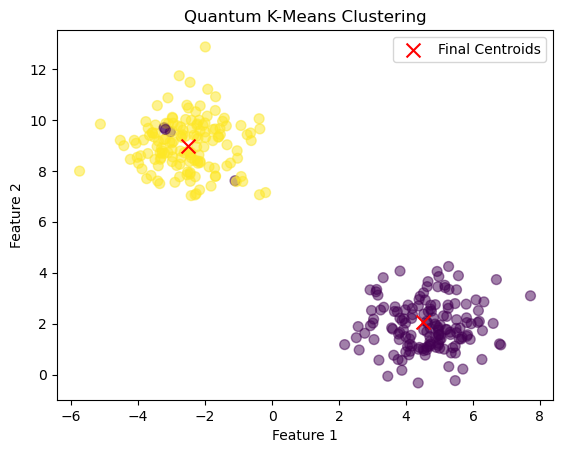

In [2]:
# Assign data points to the final clusters
assignments = []
for point in data_points:
    min_dist = float('inf')
    min_idx = -1
    for idx, centroid in enumerate(centroids):
        dist = quantum_distance(point, centroid, quantum_instance)
        if dist < min_dist:
            min_dist = dist
            min_idx = idx
    assignments.append(min_idx)

# Plot the data points and centroids
plt.scatter(data_points[:, 0], data_points[:, 1], c=assignments, cmap='viridis', marker='o', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Final Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Quantum K-Means Clustering')
plt.show()

In [13]:
import pandas as pd

# Generate the dataset
data_points, labels = make_blobs(n_samples=300, centers=2, random_state=42)

# Create a DataFrame from the dataset
data_df = pd.DataFrame(data_points, columns=['Feature 1', 'Feature 2'])
data_df['Label'] = labels

# Display the first 10 rows of the DataFrame
print("First 10 rows of the dataset:")
print(data_df.head(10))

First 10 rows of the dataset:
   Feature 1  Feature 2  Label
0   4.978375   1.557882      1
1   5.278471   0.311650      1
2  -2.522695   7.956575      0
3   5.186976   1.770977      1
4   4.929654   4.048570      1
5   3.105765   3.250847      1
6  -2.295104   7.768547      0
7   4.981635   3.849341      1
8  -2.177934   9.989831      0
9  -0.643423   9.488119      0


In [14]:
# Generate the dataset
data_points, labels = make_blobs(n_samples=300, centers=2, random_state=42)

# Print the first 10 data points and their labels
print("First 10 data points:")
for i in range(10):
    print(f"Data point {i + 1}: {data_points[i]} - Label: {labels[i]}")

First 10 data points:
Data point 1: [4.97837524 1.55788177] - Label: 1
Data point 2: [5.2784713  0.31164962] - Label: 1
Data point 3: [-2.52269485  7.9565752 ] - Label: 0
Data point 4: [5.18697622 1.77097703] - Label: 1
Data point 5: [4.92965369 4.04857048] - Label: 1
Data point 6: [3.10576467 3.25084651] - Label: 1
Data point 7: [-2.29510388  7.76854735] - Label: 0
Data point 8: [4.98163481 3.84934052] - Label: 1
Data point 9: [-2.17793419  9.98983126] - Label: 0
Data point 10: [-0.64342311  9.48811905] - Label: 0


In [21]:
from qiskit.circuit.library import EfficientSU2

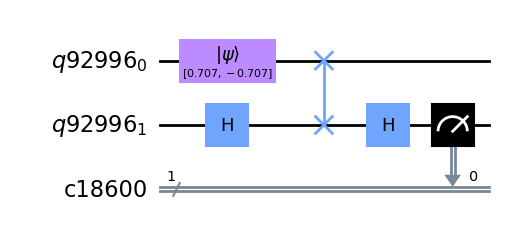

In [23]:
# Modify the quantum_distance function to return the circuit
def quantum_distance_circuit(x, y):
    # Create a quantum register with 2 qubits
    q = QuantumRegister(2)
    # Create a classical register with 1 bit
    c = ClassicalRegister(1)
    # Create a quantum circuit with the quantum and classical registers
    circuit = QuantumCircuit(q, c)

    # Normalize the difference between x and y
    diff = x - y
    norm = np.linalg.norm(diff)
    if norm == 0:
        return circuit
    diff_normalized = diff / norm

    # Prepare the state |x-y> in the first qubit
    circuit.initialize(diff_normalized, 0)

    # Compute the squared Euclidean distance using the swap test
    # Apply a Hadamard gate to the second qubit
    circuit.h(1)
    # Apply a SWAP gate between the first and second qubits
    circuit.swap(0, 1)
    # Apply a Hadamard gate to the second qubit
    circuit.h(1)
    # Measure the second qubit and store the result in the classical bit
    circuit.measure(1, 0)

    return circuit

# Pass sample data points to the modified function and draw the circuit
sample_x = np.array([1, 0])
sample_y = np.array([0, 1])
sample_circuit = quantum_distance_circuit(sample_x, sample_y)
sample_circuit.draw(output="mpl", fold=20)
